# Summary Statistics of Failed Zones

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [6]:
def my_read_file(num):
    '''This function is for reading in the csv's and panda data frames
    '''
    filename = "fail_data_" + str(num) + ".csv"
    data = pd.read_csv(filename)
    return data
num = 98
df = my_read_file(num)
df.tail(3)

,volume,aspectRatio,conditionNumber,distortion,jacobian,largestAngle,oddy,scaledJacobian,shape,shapeAndSize,shear,shearAndSize,skew,smallestAngle,stretch,taper
7541,0.003118,1.442320,5.000000e+29,-0.731749,-0.000162,182.202377,1796.145752,-0.038429,0.0,0.0,0.0,0.0,0.998571,2.028095,0.541373,0.087929
7542,0.003111,1.442651,5.000000e+29,-0.735430,-0.000163,182.210571,1810.514038,-0.038572,0.0,0.0,0.0,0.0,0.998579,2.020180,0.541294,0.087941
7543,0.003103,1.442980,5.000000e+29,-0.739046,-0.000164,182.218735,1825.015259,-0.038715,0.0,0.0,0.0,0.0,0.998586,2.012285,0.541214,0.087953


Cycles after peak of oddy spike until failure for failed zones as a distribution

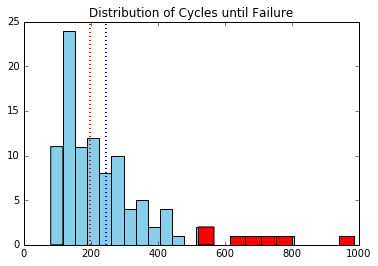

Number of Runs:  99
Outlier Index:  [6, 35, 43, 44, 74, 75, 89]
Outlier Values [720, 551, 673, 794, 521, 637, 987]
Mean:  245.04040404
Median  198.0
Standard Deviation:  158.929113173
Variance:  25258.463014


In [32]:
ttf= list()
outliers = list()
outlier_values = list()
for i in range(0,99):
    df = my_read_file(i)
    ttf.append(df.shape[0] - df.oddy.idxmax())
    if ttf[i] > 500:
        outliers.append(i)
        outlier_values.append(ttf[i])
    

plt.hist(ttf,bins = 25,color = 'skyblue')
plt.hist(outlier_values,color = 'red')
plt.axvline(ymin=0, ymax=25, x=np.mean(ttf), linewidth=2, color = 'blue',ls = 'dotted')
plt.axvline(ymin=0, ymax=25, x=np.median(ttf), linewidth=2, color = 'red',ls = 'dotted')
title = 'Distribution of Cycles until Failure'
plt.title(title)
plt.show()

print('Number of Runs: ',len(ttf))
print('Outlier Index: ',outliers)
print("Outlier Values",outlier_values)
print('Mean: ',np.mean(ttf))
print('Median ',np.median(ttf))
print('Standard Deviation: ',np.array(ttf).std())
print('Variance: ', np.array(ttf).var())

### Everything below this point is just scratch code 

In [ ]:
#Extract wanted summary statistics for each failed zone and store it in a dictionary
spike_data = {}
spike_data['min'] = min(data['oddy'])
spike_data['max'] = max(data['oddy'])
spike_data['magnitude'] = max(data['oddy']) - min(data['oddy'])
spike_data['TTF'] = 

In [102]:
###SCRATCH CODE###
ttf= list()
for i in range(0,52):
    df = my_read_file(i)
    ttf.append(df.shape[0] - df.oddy.idxmax())
ttf[:5]

[261, 316, 253, 136, 229]

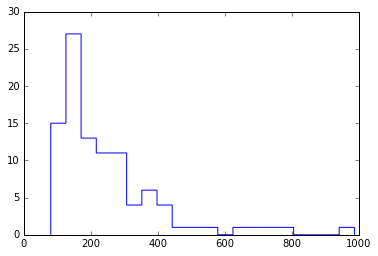

In [22]:
plt.hist(ttf,bins=20,histtype='step')
plt.show()

mean:  226.019230769
median  150.0
standard deviation  159.436446271
variance 25419.9803994


In [98]:
type(ttf)

list

In [77]:
#reading in the ID specs for the failed zones
fz = pd.read_table('failed_zones.txt',delimiter=',')
fz.tail()

,Run,Cycle,Zone
135,134,8054,980
136,135,7255,1017
137,136,7006,1004
138,137,7479,991
139,138,7243,979


In [61]:
print(fz.shape)
run = fz['Cycle'][0]
print(run)

(140, 3)
6899


In [81]:
i = 0
j = 0
fzl = list()
for i in range(0,fz.shape[0]):
        (run,cycle,zone) = (fz[fz.columns[0]][i],fz[fz.columns[1]][i],fz[fz.columns[2]][i])
        fzl.append((run,cycle,zone))

# print(fzl[:5],fzl[-5:])
(run,cycle,zone) = fzl[137]
print(run,cycle,zone,fzl[137])


136 7006 1004 (136, 7006, 1004)


In [20]:
#removing values from a list by index
#pop,remove
blah = [1,2,3,4,5,6,7,8,9,10,11,12]
print(blah)
del blah[]
print(blah)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


TypeError: list indices must be integers or slices, not list